In [1]:
# Import libraries and dependencies
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from MCForecastTools import MCSimulation

In [7]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = ["USDT-USD", "ETH-USD"],

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "7y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  2 of 2 completed


In [8]:
data.index = pd.to_datetime(data.index)
data.head()

USDT-USD                                      ETH-USD           \
                Open      High       Low     Close Volume    Open High Low   
Date                                                                         
2015-02-25  1.210160  1.215490  1.209580  1.211100      6     NaN  NaN NaN   
2015-02-26  1.210420  1.212320  1.194710  1.205740      6     NaN  NaN NaN   
2015-03-02  0.571249  0.607890  0.568314  0.606502      3     NaN  NaN NaN   
2015-03-03  0.605129  0.606229  0.604416  0.606229      3     NaN  NaN NaN   
2015-03-06  1.000000  1.000000  1.000000  1.000000     93     NaN  NaN NaN   

                         
           Close Volume  
Date                     
2015-02-25   NaN    NaN  
2015-02-26   NaN    NaN  
2015-03-02   NaN    NaN  
2015-03-03   NaN    NaN  
2015-03-06   NaN    NaN

In [10]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
data=data.dropna()
MC_even_dist = MCSimulation(
    portfolio_data = data,
    weights = [1,0],
    num_simulation = 1000,
    num_trading_days = 252*10
)
MC_even_dist.portfolio_data.head()

USDT-USD                                        ETH-USD            \
               Open High  Low Close  Volume daily_return      Open      High   
Date                                                                           
2015-08-07      1.0  1.0  1.0   1.0  189055          NaN  2.831620  3.536610   
2015-08-08      1.0  1.0  1.0   1.0    2229          0.0  2.793760  2.798810   
2015-08-09      1.0  1.0  1.0   1.0     657          0.0  0.706136  0.879810   
2015-08-10      1.0  1.0  1.0   1.0  152265          0.0  0.713989  0.729854   
2015-08-11      1.0  1.0  1.0   1.0     526          0.0  0.708087  1.131410   

                                                        
                 Low     Close     Volume daily_return  
Date                                                    
2015-08-07  2.521120  2.772120   164329.0          NaN  
2015-08-08  0.714725  0.753325   674188.0    -0.728250  
2015-08-09  0.629191  0.701897   532170.0    -0.068268  
2015-08-10  0.636546  0.708448   405283.0     0.009333  
2015-08-11  0.663235  1.067860  1463100.0     0.507323

In [11]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.001089  1.006652  0.999723  0.999098  1.007687  0.996936  1.000715   
2     1.001129  0.997712  0.993526  0.996641  1.012398  0.998585  0.999860   
3     0.997378  1.009349  0.993181  0.998510  1.008087  0.996621  0.993475   
4     0.994010  1.009118  0.991538  0.986086  1.010894  0.998934  0.982333   
...        ...       ...       ...       ...       ...       ...       ...   
2516  1.031488  0.979778  1.029852  0.776142  1.541925  1.115514  1.029363   
2517  1.030127  0.980708  1.033542  0.778008  1.551296  1.122765  1.030172   
2518  1.027525  0.984170  1.034815  0.779412  1.543914  1.126772  1.029442   
2519  1.027150  0.986981  1.031066  0.788533  1.535833  1.130189  1.035386   
2520  1.022719  0.990900  1.032164  0.791056  1.546099  1.136549  1.036726   

           7         8         9    ...       990       991       992  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.002948  0.999708  0.995398  ...  1.005730  0.998647  0.993006   
2     0.999499  1.006434  0.997239  ...  1.013127  0.993771  0.985932   
3     1.007928  1.001340  1.002901  ...  1.024381  0.996881  0.988333   
4     1.005951  0.997165  1.007282  ...  1.023257  1.000470  0.979062   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.275556  0.594470  1.052123  ...  1.422544  1.797242  0.712507   
2517  1.277813  0.591824  1.055338  ...  1.428032  1.788972  0.703327   
2518  1.259923  0.590557  1.059938  ...  1.421627  1.801447  0.695956   
2519  1.254223  0.591941  1.061185  ...  1.421850  1.792913  0.688646   
2520  1.252862  0.589569  1.064662  ...  1.418733  1.794686  0.690319   

           993       994       995       996       997       998       999  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.012129  1.001539  1.003091  1.000077  0.995775  1.006651  1.003519  
2     1.015744  0.997886  0.992975  1.001771  0.993901  1.003360  0.994062  
3     1.002909  0.999441  0.990539  1.003641  1.002064  1.003743  0.990926  
4     0.999360  0.999772  0.996226  1.008995  1.004687  1.009031  0.988073  
...        ...       ...       ...       ...       ...       ...       ...  
2516  0.827905  1.630708  1.307931  1.181700  0.631205  0.996357  1.464743  
2517  0.819867  1.631280  1.311097  1.176481  0.628252  0.988067  1.455481  
2518  0.816351  1.632714  1.314950  1.159316  0.629716  0.989121  1.459128  
2519  0.811946  1.637186  1.301619  1.168688  0.632660  0.992468  1.460521  
2520  0.811835  1.631492  1.295537  1.171290  0.630387  0.988365  1.466202  

[2521 rows x 1000 columns]

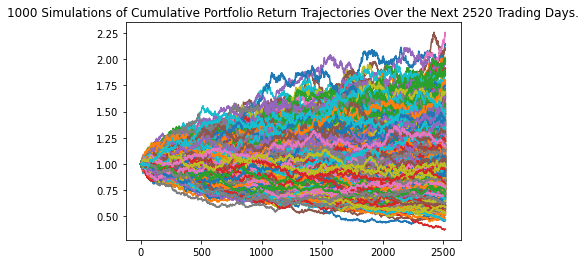

In [12]:
line_plot = MC_even_dist.plot_simulation()

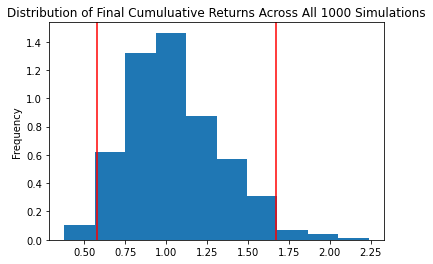

In [13]:
# Plot probability distribution and confidence intervals
att_dist_plot = MC_even_dist.plot_distribution()

In [14]:
# Fetch summary statistics from the Monte Carlo simulation results
att_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(att_tbl)

count           1000.000000
mean               1.048660
std                0.288244
min                0.378785
25%                0.840265
50%                1.014399
75%                1.222088
max                2.237517
95% CI Lower       0.575343
95% CI Upper       1.670083
Name: 2520, dtype: float64


In [15]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
att_ci_lower = round(att_tbl[8]*15000,5)
att_ci_upper = round(att_tbl[9]*15000,5)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $8630.14587 and $25051.25162.


In [16]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
data=data.dropna()
MC_even_dist = MCSimulation(
    portfolio_data = data,
    weights = [1,0],
    num_simulation = 1000,
    num_trading_days = 252*5
)
MC_even_dist.portfolio_data.head()

USDT-USD                                        ETH-USD            \
               Open High  Low Close  Volume daily_return      Open      High   
Date                                                                           
2015-08-07      1.0  1.0  1.0   1.0  189055          NaN  2.831620  3.536610   
2015-08-08      1.0  1.0  1.0   1.0    2229          0.0  2.793760  2.798810   
2015-08-09      1.0  1.0  1.0   1.0     657          0.0  0.706136  0.879810   
2015-08-10      1.0  1.0  1.0   1.0  152265          0.0  0.713989  0.729854   
2015-08-11      1.0  1.0  1.0   1.0     526          0.0  0.708087  1.131410   

                                                        
                 Low     Close     Volume daily_return  
Date                                                    
2015-08-07  2.521120  2.772120   164329.0          NaN  
2015-08-08  0.714725  0.753325   674188.0    -0.728250  
2015-08-09  0.629191  0.701897   532170.0    -0.068268  
2015-08-10  0.636546  0.708448   405283.0     0.009333  
2015-08-11  0.663235  1.067860  1463100.0     0.507323

In [17]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.010532  0.991530  0.998616  0.999384  0.999331  1.007243  0.999302   
2     1.001425  0.995488  0.997014  0.988781  0.992170  1.012008  0.995683   
3     0.999166  0.988808  0.996304  0.989251  0.990551  1.010478  0.997545   
4     1.004539  0.991685  0.997562  0.978482  0.986174  1.015261  0.996960   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.521060  0.801181  0.864222  0.936894  0.826979  1.170960  1.138718   
1257  1.536637  0.799252  0.862951  0.935249  0.820220  1.176415  1.134553   
1258  1.538517  0.800274  0.855607  0.937126  0.818666  1.181961  1.136160   
1259  1.529162  0.804177  0.861535  0.939382  0.817977  1.182731  1.134722   
1260  1.528839  0.797808  0.864908  0.950491  0.811726  1.187863  1.141304   

           7         8         9    ...       990       991       992  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.995597  0.998217  0.992809  ...  0.994446  1.006910  1.003261   
2     0.994975  0.999016  0.992159  ...  0.995658  1.022860  0.995528   
3     0.996124  0.997882  0.991641  ...  0.999343  1.021041  0.988695   
4     0.991301  1.000867  0.987984  ...  1.002419  1.021812  0.987677   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.121492  0.806791  1.212884  ...  1.072830  1.092306  0.733356   
1257  1.124241  0.806382  1.209153  ...  1.078381  1.094686  0.740071   
1258  1.119985  0.809899  1.203276  ...  1.084591  1.094505  0.739938   
1259  1.116621  0.812641  1.198887  ...  1.081121  1.096128  0.738110   
1260  1.122101  0.814488  1.187282  ...  1.090381  1.092306  0.740708   

           993       994       995       996       997       998       999  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.013950  1.002865  1.000657  0.999808  1.001241  0.997764  1.007740  
2     1.015729  1.012513  0.999053  0.992054  1.000885  1.004460  1.005672  
3     1.015985  1.020632  1.000302  0.992367  1.005774  1.006511  0.997393  
4     1.008316  1.007205  0.999597  0.992721  1.008410  1.015098  0.985410  
...        ...       ...       ...       ...       ...       ...       ...  
1256  0.901525  1.098920  0.907465  1.053233  0.992462  0.997582  0.975382  
1257  0.898678  1.107697  0.913404  1.050998  1.000697  1.000138  0.968302  
1258  0.894158  1.103282  0.915259  1.050349  0.998550  0.990349  0.973599  
1259  0.896324  1.104007  0.925873  1.053423  0.996201  0.983647  0.972436  
1260  0.894998  1.107214  0.919411  1.040074  0.990938  0.978193  0.976330  

[1261 rows x 1000 columns]

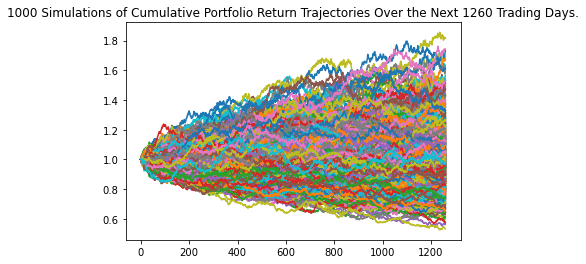

In [18]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

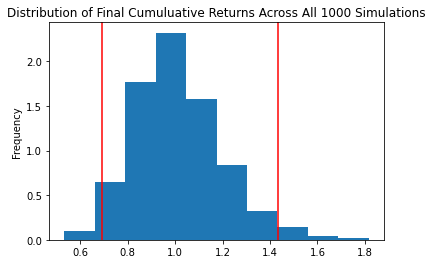

In [19]:
# Plot probability distribution and confidence intervals
att_dist_plot = MC_even_dist.plot_distribution()

In [20]:
# Fetch summary statistics from the Monte Carlo simulation results
att_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(att_tbl)

count           1000.000000
mean               1.012814
std                0.186761
min                0.532534
25%                0.884771
50%                0.994205
75%                1.126189
max                1.816388
95% CI Lower       0.692341
95% CI Upper       1.432698
Name: 1260, dtype: float64


In [21]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
att_ci_lower = round(att_tbl[8]*15000,2)
att_ci_upper = round(att_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $10385.11 and $21490.46.


In [22]:
# Running a Monte Carlo simulation to forecast 15 years cumulative returns
data=data.dropna()
MC_even_dist = MCSimulation(
    portfolio_data = data,
    weights = [1,0],
    num_simulation = 1000,
    num_trading_days = 252*15
)
MC_even_dist.portfolio_data.head()

USDT-USD                                        ETH-USD            \
               Open High  Low Close  Volume daily_return      Open      High   
Date                                                                           
2015-08-07      1.0  1.0  1.0   1.0  189055          NaN  2.831620  3.536610   
2015-08-08      1.0  1.0  1.0   1.0    2229          0.0  2.793760  2.798810   
2015-08-09      1.0  1.0  1.0   1.0     657          0.0  0.706136  0.879810   
2015-08-10      1.0  1.0  1.0   1.0  152265          0.0  0.713989  0.729854   
2015-08-11      1.0  1.0  1.0   1.0     526          0.0  0.708087  1.131410   

                                                        
                 Low     Close     Volume daily_return  
Date                                                    
2015-08-07  2.521120  2.772120   164329.0          NaN  
2015-08-08  0.714725  0.753325   674188.0    -0.728250  
2015-08-09  0.629191  0.701897   532170.0    -0.068268  
2015-08-10  0.636546  0.708448   405283.0     0.009333  
2015-08-11  0.663235  1.067860  1463100.0     0.507323

In [23]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.002296  1.003739  1.005668  1.001214  0.996442  1.011012  1.000253   
2     0.996448  1.002603  1.005250  0.996638  1.006795  1.016946  1.001755   
3     0.988653  1.007220  1.006641  0.998067  1.009157  1.012449  1.002809   
4     0.974843  1.010335  0.996351  0.992525  1.005066  1.003154  1.002940   
...        ...       ...       ...       ...       ...       ...       ...   
3776  1.169044  0.929711  0.901361  0.748003  0.999315  0.785258  0.813418   
3777  1.172041  0.930158  0.897547  0.747071  0.999724  0.783981  0.812666   
3778  1.170442  0.935788  0.900549  0.749659  1.004125  0.780309  0.805287   
3779  1.179842  0.941713  0.893535  0.749828  1.002439  0.783483  0.807625   
3780  1.175455  0.935933  0.883513  0.755202  0.998522  0.790573  0.807044   

           7         8         9    ...       990       991       992  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.997451  1.011388  1.005056  ...  0.992227  0.990189  0.993413   
2     0.997994  1.003495  1.005074  ...  0.997929  0.984165  1.004090   
3     1.000400  1.012280  0.993083  ...  1.000926  0.991745  1.006573   
4     0.999529  1.007249  0.995044  ...  1.004088  0.997067  1.002275   
...        ...       ...       ...  ...       ...       ...       ...   
3776  0.800072  0.679836  1.375901  ...  1.377734  0.609024  1.049214   
3777  0.805245  0.678578  1.384835  ...  1.391846  0.611832  1.058601   
3778  0.803856  0.673258  1.380686  ...  1.377934  0.619176  1.065981   
3779  0.806226  0.678590  1.366968  ...  1.382520  0.621202  1.059891   
3780  0.805032  0.679456  1.380475  ...  1.372154  0.619920  1.062059   

           993       994       995       996       997       998       999  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.994565  0.991610  0.996028  0.995425  0.999775  1.000969  1.003752  
2     0.985493  0.993444  0.998802  0.996119  1.001866  0.992926  1.011377  
3     0.978230  0.991926  0.996895  0.997533  1.009113  0.984893  1.009367  
4     0.976827  0.988450  0.999811  0.999635  1.012961  0.983574  1.003931  
...        ...       ...       ...       ...       ...       ...       ...  
3776  1.038382  1.358664  0.789964  1.411845  1.236034  1.734812  2.178042  
3777  1.038012  1.347533  0.790769  1.411738  1.235266  1.726663  2.177168  
3778  1.033004  1.353988  0.791310  1.402094  1.239205  1.748895  2.169754  
3779  1.033310  1.341012  0.793250  1.408170  1.232226  1.744728  2.165065  
3780  1.040244  1.342190  0.783237  1.404176  1.226628  1.749326  2.159992  

[3781 rows x 1000 columns]

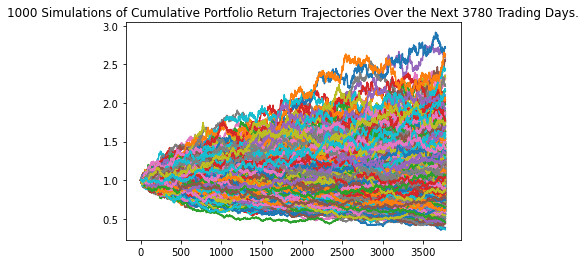

In [24]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

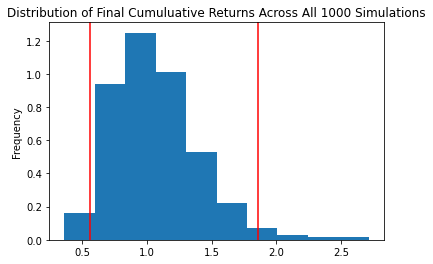

In [25]:
# Plot probability distribution and confidence intervals
att_dist_plot = MC_even_dist.plot_distribution()

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
att_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(att_tbl)

count           1000.000000
mean               1.067217
std                0.341032
min                0.359533
25%                0.820309
50%                1.019297
75%                1.259262
max                2.715061
95% CI Lower       0.554974
95% CI Upper       1.860736
Name: 3780, dtype: float64


In [27]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
att_ci_lower = round(att_tbl[8]*15000,2)
att_ci_upper = round(att_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 15 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 15 years will end within in the range of $8324.61 and $27911.04.
